In our lab today, we'll be looking at socio-economic indicators. The idea is that we can measure a property, like the demographics or social characteristics of a place, using text data instead of using a survey instrument. The question we'll ask here is, what languages are being used in different countries in digital contexts? By digital contexts we mean the web and tweets.

Let's start by getting our environment ready.

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join(".", "data")
print("Done!")

Done!


Our data will be tweets. We have a data set that represents most countries in the world using tweets, a total of 17 billion words. And another that uses web pages, a total of about 400 billion words. This is too much data to work with here, so we've already processed the data set. We'll just work with the aggregates. Here we load a CSV file with those aggregates.

In [2]:
file = os.path.join(ai.data_dir, "map.diversity.csv")
df = pd.read_csv(file)
print(df)

    iso3   Total_TW  Twitter: N. Languages   Total_CC  Web: N. Languages  \
0    ABW          0                      0   12555508                  4   
1    AFG   59404971                     15   38832308                  3   
2    AGO   27336852                      8   43341530                  3   
3    ALB   52865570                     15  330024553                  4   
4    AND   12422507                      6   82380309                  4   
..   ...        ...                    ...        ...                ...   
194  WSM    5577702                      8          0                  0   
195  YEM   36924012                      5          0                  0   
196  ZAF  231321197                      4          0                  0   
197  ZMB   35868340                      7     215464                  1   
198  ZWE   75896203                      5          0                  0   

     Twitter: HHI  Web: HHI  
0             NaN  0.404544  
1        0.160483  0.401860

This dataframe gives us data per country. The numbers in "Total" represent the amount of data, measured in words. So, this means that we have a total of 58 million words representing Afghanistan in tweets. The measure that we are interested in have to do with linguistic diversity: how many languages are used? *N_Languages* gives us the number of languages that account for more than 1% of a country's data. And *HHI* gives us the Herfindahl-Hirschman Index, representing the degree of monopoly that any one language has. This is the sum of the square of shares of each language.

Now, let's make a map to see what linguistic diversity looks like in digital settings. We're going to use the *geopandas* package. The code below loads a basemap from geopandas and merges it with our data, using the iso3 country codes as the shared column. We get rid of Antarctica because we don't really need it here.

In [3]:
import geopandas
import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world.loc[43,"iso_a3"] = "FRA"
world.loc[21,"iso_a3"] = "NOR"

world = world.merge(right = df, how = "left", left_on = "iso_a3", right_on = "iso3")
world = world[world.name != "Antarctica"]
print(world)


       pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry iso3    

Now we can make a map. First, let's use the total number of words per country for tweets.

(-198.0, 198.00000000000006, -62.574678, 90.607978)

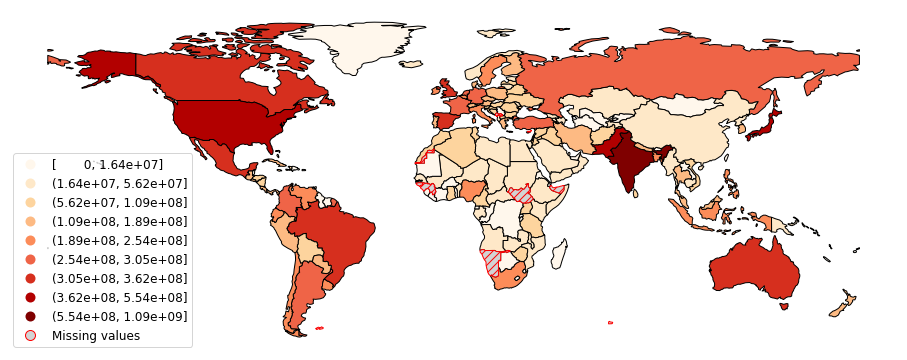

In [4]:
ax = world.plot(column = "Total_TW",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 16),
            legend_kwds = {"fmt": "{:.3g}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

(-198.0, 198.00000000000006, -62.574678, 90.607978)

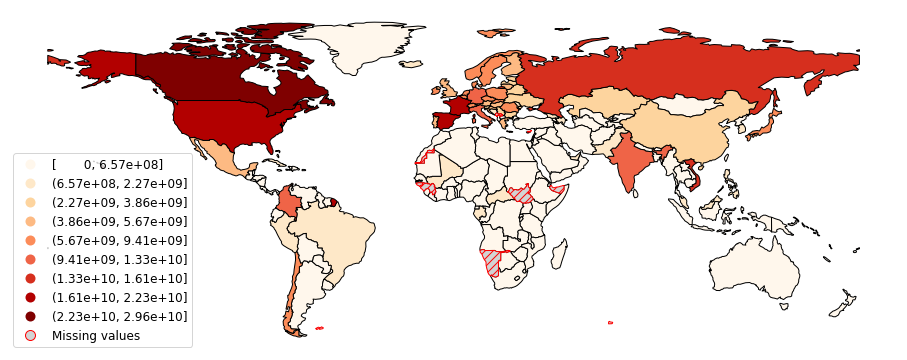

In [5]:
ax = world.plot(column = "Total_CC",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 12),
            legend_kwds = {"fmt": "{:.3g}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

The web dataset (above) has so much data from countries like the US and Russia and France that other countries appear to be not well represented. However, even the countries with the smallest web corpora have a great deal of data.

(-198.0, 198.00000000000006, -62.574678, 90.607978)

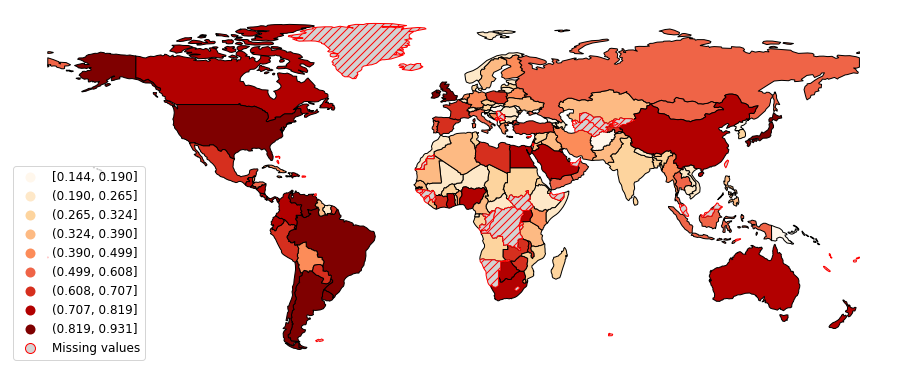

In [6]:
ax = world.plot(column = "Twitter: HHI",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 12),
            legend_kwds = {"fmt": "{:,.3f}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds = {"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

(-198.0, 198.00000000000006, -62.574678, 90.607978)

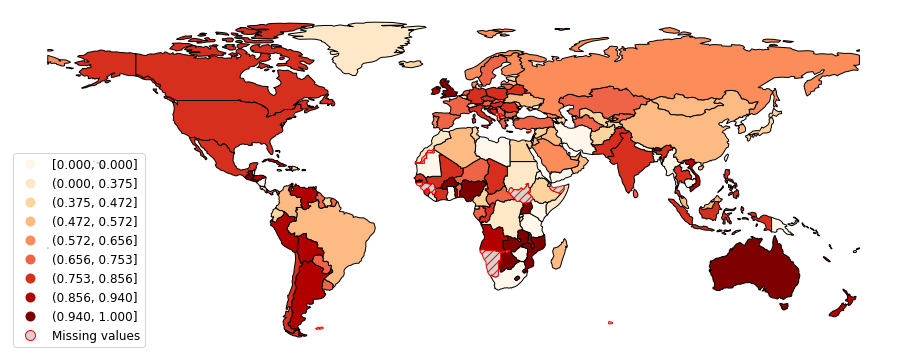

In [7]:
world.plot(column = "Web: HHI",  
            legend = True, 
            cmap = "OrRd",
            scheme = "NaturalBreaks",
            k = 9,
            figsize=(16, 12),
            legend_kwds = {"fmt": "{:,.3f}", "loc": "lower left", "facecolor": "white", "fontsize":"12"},
            missing_kwds = {"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"},
            edgecolor = "black",
            )

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.axis('off')

This is quite a bit different! These two sources are picking up different patterns in language usage.

But here we've seen how to take a text-based measure of a demographic characteristic and transform it into a geographic visualization. This is a useful pipeline, because we've gone from a text classifier (language labels) to a quantitative measure (the HHI) to a map of linguistic diversity.